In [19]:
#Here we load the Mnist data from Keras
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#get an idea of shape of train data
x_train.shape
x_test.shape

(10000, 28, 28)

In [20]:
x_test.shape

(10000, 28, 28)

3


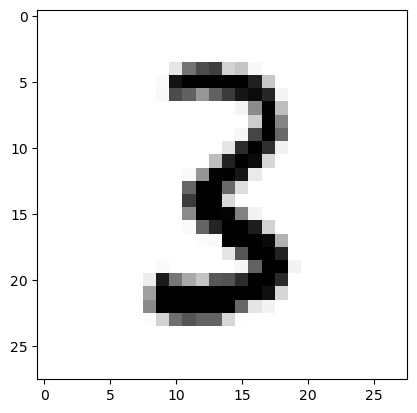

In [21]:
#Here we preview an element of the data
import matplotlib.pyplot as plt
 # Only use this if using iPython
image_index = 50000# may select anything up to 60,000
print(y_train[image_index]) # To display the label number
plt.imshow(x_train[image_index], cmap='Greys') #to show the image associated with label

In [22]:
x_train[image_index]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  47, 160, 195,
        205,  71,  86,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  12, 238, 254, 254,
        254, 254, 254, 227,  84,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [23]:
#Reshaping and preprocessing
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [24]:
#Building to Keras
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential() #chosen Keras model
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #convolution
model.add(MaxPooling2D(pool_size=(2, 2))) #pooling layer
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(64, activation=tf.nn.relu)) #dense layer relu
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax)) #dense layer softmax

In [25]:
#Compiling and fitting the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
               metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8791 - loss: 0.4070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9652 - loss: 0.1146
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9756 - loss: 0.0765
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9819 - loss: 0.0588
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9831 - loss: 0.0503
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9870 - loss: 0.0415
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9877 - loss: 0.0368
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9899 - loss: 0.0304
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9887 - loss: 0.0315
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0274


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
9


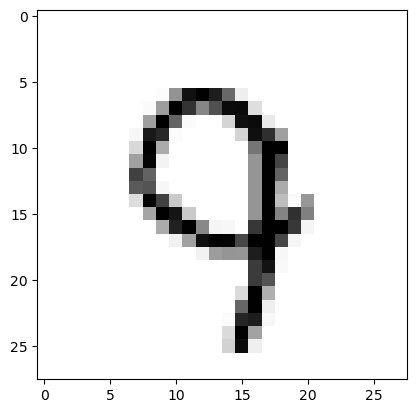

In [26]:
#testing on test data
image_index = 999 #choose random value up to 10000
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())


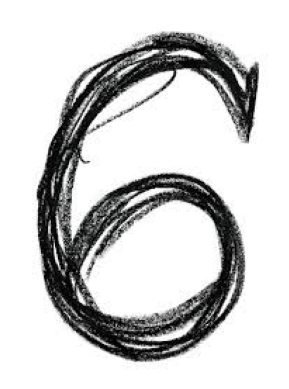

In [27]:
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("which.jpg")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [28]:
im.shape

(263, 192, 3)

In [32]:
from tensorflow.keras.preprocessing import image #Import Keras image processor
#load downloaded image and resze to target size
img = image.load_img("which.jpg", target_size=(28, 28),color_mode="grayscale")
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

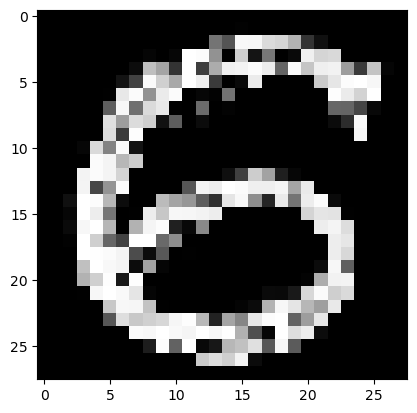

In [33]:
plt.imshow(img_array,cmap="Greys")

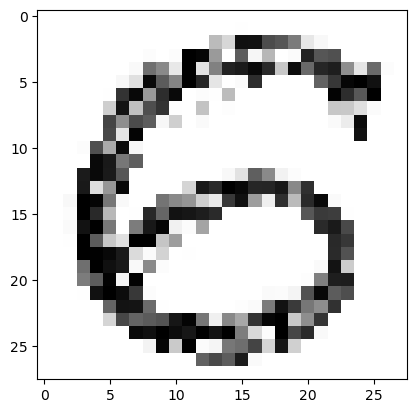

In [34]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5


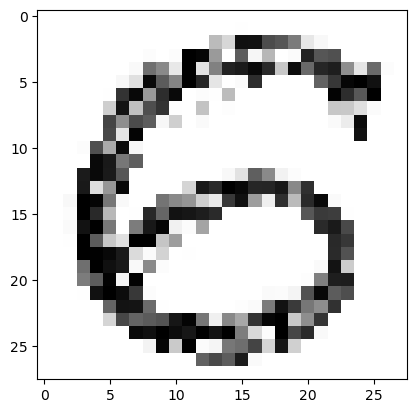

In [35]:
#Running Prediction on the image
plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())

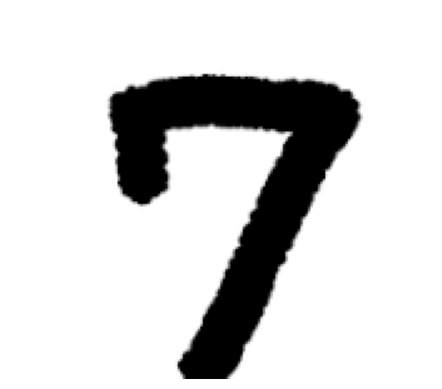

In [37]:
#Previewing the downloaded image 
import cv2
import numpy as np
from matplotlib import pyplot as plt
# Load image as grayscale
im = cv2.imread("which1.png")
# Show image
plt.imshow(im, cmap="gray"), plt.axis("off")
plt.show()

In [38]:
from tensorflow.keras.preprocessing import image #Import Keras image processor
#load downloaded image and resze to target size
img = image.load_img("which1.png", target_size=(28, 28),color_mode="grayscale")
#convert loaded and resized image to array of numbers
img_array = image.img_to_array(img)
#Convert image array to 2D format that can be predicted upon
img_array = img_array[:,:,0]
img_array.shape

(28, 28)

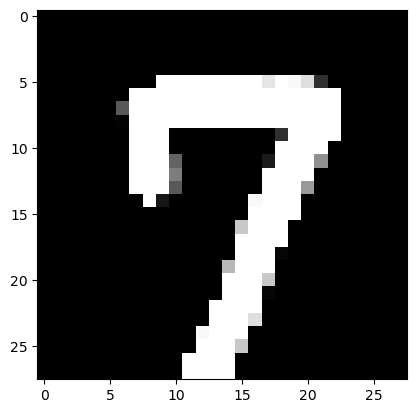

In [39]:
plt.imshow(img_array,cmap="Greys")

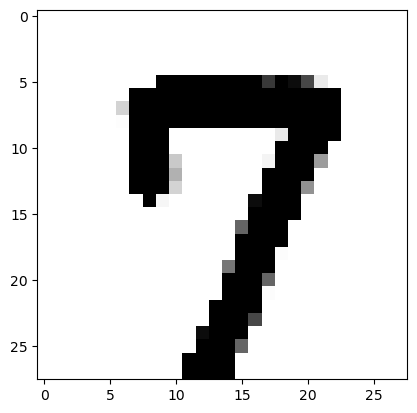

In [40]:
#invert loaded image array into same format as data used for training
img_array=1-img_array
plt.imshow(img_array,cmap="Greys")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
7


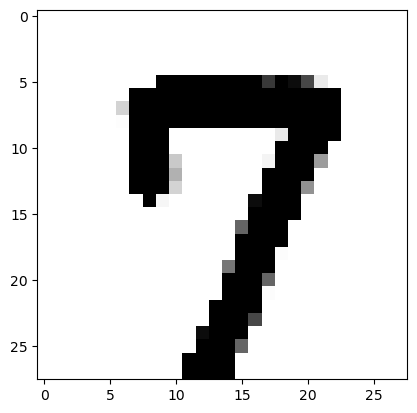

In [43]:
plt.imshow(img_array,cmap="Greys")
pred = model.predict(img_array.reshape(1, 28, 28, 1))
print(pred.argmax())